In [1]:
import TwitterKeys #My Twitter API Keys

In [2]:
CONSUMER_KEY = TwitterKeys.CONSUMER_KEY
CONSUMER_SECRET = TwitterKeys.CONSUMER_SECRET
ACCESS_TOKEN = TwitterKeys.ACCESS_TOKEN
ACCESS_TOKEN_SECRET = TwitterKeys.ACCESS_TOKEN_SECRET

In [3]:
savefile = open('twitter.txt','w')
savefile.close()

In [4]:
import pandas as pd
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import time
import re
import matplotlib. pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [5]:
class savetweepyTweets(StreamListener):
    
    def __init__(self):
        savetweepyTweets.length = 0
        savetweepyTweets.max_length = 100
        savefile = open('twitter.txt','w')
        savefile.close()
        
    def on_data(self, data):
    
        try:
            #print (type(data))
            #print ("New tweet")
            savefile = open('twitter.txt','a')
            savefile.write(data)
            savefile.write('\n')
            savefile.close()
            savetweepyTweets.length += 1
            #x =x+1
            if savetweepyTweets.length >= savetweepyTweets.max_length:
                savetweepyTweets.on_error(self,"Disconnected Gracefully")
            return True
        except BaseException as e:
            print ("Failed ", str(e))
            self.disconnect()
            
    def on_error(self, status):
        print (status)
        stream.disconnect()

tl = savetweepyTweets()
au = OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
au.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
stream = Stream(au,tl)
api = tweepy.API(au, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
stream.filter(track=["Movies"], languages=['en'])

Disconnected Gracefully


In [7]:
import json
tweets_data = []
json_data = open('twitter.txt','r')
#print type(json_data)
for line in json_data:
    #print type(line)
    try:
        twe = json.loads(line) 
        #print type(twe)
        tweets_data.append(twe)
    except:
        continue


In [8]:
#tweepy.user is another dictionary i can extract info from

In [9]:
tweet_df = pd.DataFrame(tweets_data)
tweet_df.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,display_text_range,possibly_sensitive,extended_entities,extended_tweet,withheld_in_countries
0,Sun Feb 23 22:43:44 +0000 2020,1231711264143020033,1231711264143020033,RT @gol_mia: @TheQuartering @EyesOnTheRight it...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,None,...,1582497824117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun Feb 23 22:43:46 +0000 2020,1231711274959945728,1231711274959945728,RT @in24s_: Hackers in movies do dis shit for ...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,1582497826696,1.227962e+18,1227962344476729350,{'created_at': 'Thu Feb 13 14:26:52 +0000 2020...,"{'url': 'https://t.co/cJwh5TmboV', 'expanded':...",NaN,NaN,NaN,NaN,NaN
2,Sun Feb 23 22:43:46 +0000 2020,1231711276046454784,1231711276046454784,@CatholicAmina Everyone hates Catholicism unti...,"<a href=""http://twitter.com/download/android"" ...",False,1.231699e+18,1231698774558486529,9.797665e+17,979766490756009987,...,1582497826955,NaN,NaN,NaN,NaN,"[15, 140]",NaN,NaN,NaN,NaN
3,Sun Feb 23 22:43:47 +0000 2020,1231711276843360256,1231711276843360256,I wish #TheyGottaHaveUs had like two more epis...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,1582497827145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sun Feb 23 22:43:47 +0000 2020,1231711277275205632,1231711277275205632,RT @Montchelle66: He’ll back Trump later on......,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,1582497827248,1.231306e+18,1231306387638177792,{'created_at': 'Sat Feb 22 19:54:54 +0000 2020...,"{'url': 'https://t.co/HBhGzFt3qR', 'expanded':...",NaN,NaN,NaN,NaN,NaN
5,Sun Feb 23 22:43:49 +0000 2020,1231711284988710912,1231711284988710912,The Mandalorian uses this amazing trick that c...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,None,...,1582497829087,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
6,Sun Feb 23 22:43:49 +0000 2020,1231711286766915585,1231711286766915585,@OrcaBC101 Lord knows there are lots of movies...,"<a href=""http://twitter.com/download/android"" ...",False,1.231708e+18,1231708337781100544,9.557731e+07,95577307,...,1582497829511,NaN,NaN,NaN,NaN,"[11, 81]",NaN,NaN,NaN,NaN
7,Sun Feb 23 22:43:51 +0000 2020,1231711296233648128,1231711296233648128,RT @StevenElkins16: 123moviesgo - Watch Movies...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,None,...,1582497831768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Sun Feb 23 22:43:52 +0000 2020,1231711298230071296,1231711298230071296,RT @DirtyDad4u: Pull her hair and make her scr...,"<a href=""https://ourmodels.cc/"" rel=""nofollow""...",False,NaN,None,NaN,None,...,1582497832244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Sun Feb 23 22:43:53 +0000 2020,1231711301916876800,1231711301916876800,is this even a real question? https://t.co/NNI...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,1582497833123,1.231575e+18,1231574973237596167,{'created_at': 'Sun Feb 23 13:42:09 +0000 2020...,"{'url': 'https://t.co/GoZtQF6zvE', 'expanded':...","[0, 29]",False,"{'media': [{'id': 1231711296296554496, 'id_str...",NaN,NaN


In [10]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 37 columns):
created_at                   100 non-null object
id                           100 non-null int64
id_str                       100 non-null object
text                         100 non-null object
source                       100 non-null object
truncated                    100 non-null bool
in_reply_to_status_id        21 non-null float64
in_reply_to_status_id_str    21 non-null object
in_reply_to_user_id          21 non-null float64
in_reply_to_user_id_str      21 non-null object
in_reply_to_screen_name      21 non-null object
user                         100 non-null object
geo                          0 non-null object
coordinates                  0 non-null object
place                        3 non-null object
contributors                 0 non-null object
retweeted_status             45 non-null object
is_quote_status              100 non-null bool
quote_count                  10

In [11]:
df = tweet_df[["created_at","text"]]

In [12]:
df['text_mod'] = df['text'].apply(lambda x: re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", x))

/Users/michael/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.head()

,created_at,text,text_mod
0,Sun Feb 23 22:43:44 +0000 2020,RT @gol_mia: @TheQuartering @EyesOnTheRight it...,RT golmia TheQuartering EyesOnTheRight it wasn...
1,Sun Feb 23 22:43:46 +0000 2020,RT @in24s_: Hackers in movies do dis shit for ...,RT in24s Hackers in movies do dis shit for a m...
2,Sun Feb 23 22:43:46 +0000 2020,@CatholicAmina Everyone hates Catholicism unti...,CatholicAmina Everyone hates Catholicism until...
3,Sun Feb 23 22:43:47 +0000 2020,I wish #TheyGottaHaveUs had like two more epis...,I wish TheyGottaHaveUs had like two more episo...
4,Sun Feb 23 22:43:47 +0000 2020,RT @Montchelle66: He’ll back Trump later on......,RT Montchelle66 Hell back Trump later on Maybe...


In [14]:
from textblob import TextBlob

In [15]:
df['polarity'] = df['text_mod'].map(lambda x: TextBlob(x).sentiment.polarity)

/Users/michael/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df.head()

,created_at,text,text_mod,polarity
0,Sun Feb 23 22:43:44 +0000 2020,RT @gol_mia: @TheQuartering @EyesOnTheRight it...,RT golmia TheQuartering EyesOnTheRight it wasn...,0.000000
1,Sun Feb 23 22:43:46 +0000 2020,RT @in24s_: Hackers in movies do dis shit for ...,RT in24s Hackers in movies do dis shit for a m...,-0.200000
2,Sun Feb 23 22:43:46 +0000 2020,@CatholicAmina Everyone hates Catholicism unti...,CatholicAmina Everyone hates Catholicism until...,0.000000
3,Sun Feb 23 22:43:47 +0000 2020,I wish #TheyGottaHaveUs had like two more epis...,I wish TheyGottaHaveUs had like two more episo...,0.366667
4,Sun Feb 23 22:43:47 +0000 2020,RT @Montchelle66: He’ll back Trump later on......,RT Montchelle66 Hell back Trump later on Maybe...,0.000000


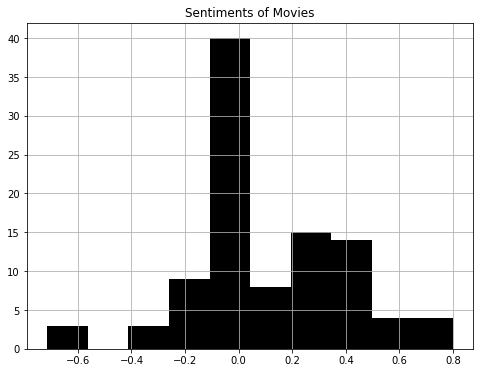

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
df['polarity'].hist(bins=10,
             ax=ax,
             color="black")

plt.title("Sentiments of Movies")
plt.show()

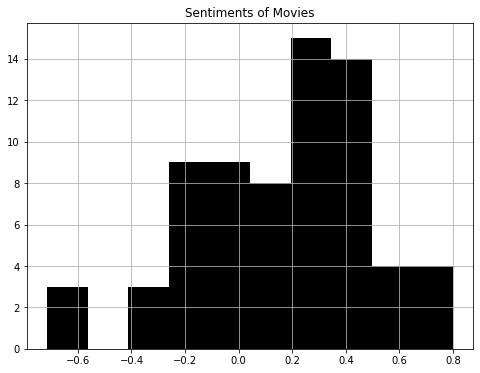

In [18]:
df = df[df['polarity'] != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
df['polarity'].hist(bins=10,
             ax=ax,
             color="black")

plt.title("Sentiments of Movies")
plt.show()

In [19]:
df['polarity_actual'] = (df['polarity'] > 0.5) & 1
df['polarity_actual'] = df['polarity_actual'].replace([False, True], [0,1])

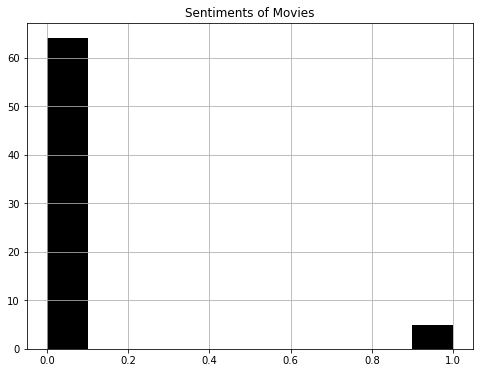

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
df['polarity_actual'].hist(bins=10,
             ax=ax,
             color="black")

plt.title("Sentiments of Movies")
plt.show()

In [21]:
df[df['polarity_actual'] == 0].shape[0], df[df['polarity_actual'] == 1].shape[0]

(64, 5)

In [22]:
df.head()

,created_at,text,text_mod,polarity,polarity_actual
1,Sun Feb 23 22:43:46 +0000 2020,RT @in24s_: Hackers in movies do dis shit for ...,RT in24s Hackers in movies do dis shit for a m...,-0.200000,0
3,Sun Feb 23 22:43:47 +0000 2020,I wish #TheyGottaHaveUs had like two more epis...,I wish TheyGottaHaveUs had like two more episo...,0.366667,0
5,Sun Feb 23 22:43:49 +0000 2020,The Mandalorian uses this amazing trick that c...,The Mandalorian uses this amazing trick that c...,0.600000,1
7,Sun Feb 23 22:43:51 +0000 2020,RT @StevenElkins16: 123moviesgo - Watch Movies...,RT StevenElkins16 123moviesgo Watch Movies On...,0.450000,0
8,Sun Feb 23 22:43:52 +0000 2020,RT @DirtyDad4u: Pull her hair and make her scr...,RT DirtyDad4u Pull her hair and make her screa...,0.100000,0


In [23]:
from nltk.tokenize import word_tokenize

In [24]:
df['tokenize'] = df['text_mod'].map(lambda x: word_tokenize(x))

In [25]:
df.reset_index(drop=True, inplace=True)

In [26]:
df.head()

,created_at,text,text_mod,polarity,polarity_actual,tokenize
0,Sun Feb 23 22:43:46 +0000 2020,RT @in24s_: Hackers in movies do dis shit for ...,RT in24s Hackers in movies do dis shit for a m...,-0.200000,0,"[RT, in24s, Hackers, in, movies, do, dis, shit..."
1,Sun Feb 23 22:43:47 +0000 2020,I wish #TheyGottaHaveUs had like two more epis...,I wish TheyGottaHaveUs had like two more episo...,0.366667,0,"[I, wish, TheyGottaHaveUs, had, like, two, mor..."
2,Sun Feb 23 22:43:49 +0000 2020,The Mandalorian uses this amazing trick that c...,The Mandalorian uses this amazing trick that c...,0.600000,1,"[The, Mandalorian, uses, this, amazing, trick,..."
3,Sun Feb 23 22:43:51 +0000 2020,RT @StevenElkins16: 123moviesgo - Watch Movies...,RT StevenElkins16 123moviesgo Watch Movies On...,0.450000,0,"[RT, StevenElkins16, 123moviesgo, Watch, Movie..."
4,Sun Feb 23 22:43:52 +0000 2020,RT @DirtyDad4u: Pull her hair and make her scr...,RT DirtyDad4u Pull her hair and make her screa...,0.100000,0,"[RT, DirtyDad4u, Pull, her, hair, and, make, h..."


In [27]:
df_twitter = df

In [28]:
import os
print(os.path.basename('/Users/michael/Desktop/devmasters/day13-Twitter_HackDay/aclImdb/train/pos/'))
#try taking all the data sets yelp, amazon, etc

In [29]:
import glob
import pandas as pd
pos_train = glob.glob("aclImdb/train/pos/*.txt")
neg_train = glob.glob("aclImdb/train/neg/*.txt")
pos_test = glob.glob("aclImdb/test/pos/*.txt")
neg_test = glob.glob("aclImdb/test/neg/*.txt")

In [30]:
neg_train

['aclImdb/train/neg/1821_4.txt',
 'aclImdb/train/neg/10402_1.txt',
 'aclImdb/train/neg/1062_4.txt',
 'aclImdb/train/neg/9056_1.txt',
 'aclImdb/train/neg/5392_3.txt',
 'aclImdb/train/neg/2682_3.txt',
 'aclImdb/train/neg/3351_4.txt',
 'aclImdb/train/neg/399_2.txt',
 'aclImdb/train/neg/10447_1.txt',
 'aclImdb/train/neg/10096_1.txt',
 'aclImdb/train/neg/9850_1.txt',
 'aclImdb/train/neg/4392_3.txt',
 'aclImdb/train/neg/8056_1.txt',
 'aclImdb/train/neg/11890_1.txt',
 'aclImdb/train/neg/6435_3.txt',
 'aclImdb/train/neg/3253_3.txt',
 'aclImdb/train/neg/1125_3.txt',
 'aclImdb/train/neg/5518_1.txt',
 'aclImdb/train/neg/8487_1.txt',
 'aclImdb/train/neg/8013_1.txt',
 'aclImdb/train/neg/9248_3.txt',
 'aclImdb/train/neg/10424_2.txt',
 'aclImdb/train/neg/2780_4.txt',
 'aclImdb/train/neg/6470_3.txt',
 'aclImdb/train/neg/11447_1.txt',
 'aclImdb/train/neg/437_4.txt',
 'aclImdb/train/neg/12383_2.txt',
 'aclImdb/train/neg/9699_3.txt',
 'aclImdb/train/neg/9833_2.txt',
 'aclImdb/train/neg/7106_1.txt',
 'acl

In [31]:
def getlabeleddata(input_data):
    text_list = []
    
    for i in range(len(input_data)):
        fp = open(input_data[i],'r')
        text_list.append(fp.read())
        fp.close()
        
    return text_list
        

In [32]:
pos_train_df = pd.DataFrame(getlabeleddata(pos_train))
neg_train_df = pd.DataFrame(getlabeleddata(neg_train))
pos_test_df = pd.DataFrame(getlabeleddata(pos_test))
neg_test_df = pd.DataFrame(getlabeleddata(neg_test))

In [33]:
pos_train_df.head()

,0
0,For a movie that gets no respect there sure ar...
1,Bizarre horror movie filled with famous faces ...
2,"A solid, if unremarkable film. Matthau, as Ein..."
3,It's a strange feeling to sit alone in a theat...
4,"You probably all already know this by now, but..."


In [34]:
neg_train_df.head()

,0
0,Working with one of the best Shakespeare sourc...
1,"Well...tremors I, the original started off in ..."
2,Ouch! This one was a bit painful to sit throug...
3,"I've seen some crappy movies in my life, but t..."
4,"""Carriers"" follows the exploits of two guys an..."


In [35]:
pos_train_df['polarity'] = 1
neg_train_df['polarity'] = 0
pos_test_df['polarity'] = 1
neg_test_df['polarity'] = 0

In [36]:
pos_train_df.rename(columns={0: "text"}, inplace=True)
neg_train_df.rename(columns={0: "text"}, inplace=True)
pos_test_df.rename(columns={0: "text"}, inplace=True)
neg_test_df.rename(columns={0: "text"}, inplace=True)

In [37]:
neg_test_df.head()

,text,polarity
0,Alan Rickman & Emma Thompson give good perform...,0
1,I have seen this movie and I did not care for ...,0
2,"In Los Angeles, the alcoholic and lazy Hank Ch...",0
3,"This film is bundled along with ""Gli fumavano ...",0
4,I only comment on really very good films and o...,0


In [38]:
pos_test_df.head()

,text,polarity
0,"Based on an actual story, John Boorman shows t...",1
1,This is a gem. As a Film Four production - the...,1
2,"I really like this show. It has drama, romance...",1
3,This is the best 3-D experience Disney has at ...,1
4,"Of the Korean movies I've seen, only three had...",1


In [39]:
train = pd.concat([pos_train_df, neg_train_df])
train.head()

,text,polarity
0,For a movie that gets no respect there sure ar...,1
1,Bizarre horror movie filled with famous faces ...,1
2,"A solid, if unremarkable film. Matthau, as Ein...",1
3,It's a strange feeling to sit alone in a theat...,1
4,"You probably all already know this by now, but...",1


In [40]:
test = pd.concat([pos_test_df, neg_test_df])
test.head()

,text,polarity
0,"Based on an actual story, John Boorman shows t...",1
1,This is a gem. As a Film Four production - the...,1
2,"I really like this show. It has drama, romance...",1
3,This is the best 3-D experience Disney has at ...,1
4,"Of the Korean movies I've seen, only three had...",1


In [41]:
train.text.iloc[0]

'For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.'

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [43]:
#look at stopwords and build my own
vect = CountVectorizer(stop_words='english')
word_count_vector=vect.fit_transform(train['text'])
word_count_vector.shape

(25000, 74538)

In [44]:
print(word_count_vector)

  (0, 43989)	2
  (0, 27205)	1
  (0, 55059)	1
  (0, 64360)	1
  (0, 39342)	1
  (0, 41984)	1
  (0, 52870)	1
  (0, 38841)	1
  (0, 26967)	1
  (0, 32537)	1
  (0, 35276)	1
  (0, 49903)	1
  (0, 1667)	1
  (0, 26280)	1
  (0, 41324)	1
  (0, 62619)	1
  (0, 57669)	1
  (0, 62775)	1
  (0, 43745)	1
  (0, 11557)	1
  (0, 1314)	1
  (0, 58045)	1
  (0, 71970)	1
  (0, 2457)	1
  (0, 60425)	1
  :	:
  (24999, 73853)	1
  (24999, 59703)	1
  (24999, 37830)	1
  (24999, 44006)	1
  (24999, 11465)	1
  (24999, 2148)	1
  (24999, 31859)	1
  (24999, 65136)	1
  (24999, 52653)	1
  (24999, 55096)	1
  (24999, 2938)	1
  (24999, 29738)	1
  (24999, 25645)	1
  (24999, 71955)	1
  (24999, 53997)	1
  (24999, 65548)	1
  (24999, 43508)	1
  (24999, 63519)	1
  (24999, 3818)	1
  (24999, 71394)	1
  (24999, 13022)	1
  (24999, 63962)	2
  (24999, 18828)	1
  (24999, 67354)	1
  (24999, 11996)	1


In [45]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [46]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=vect.get_feature_names(), columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
movie,1.490279
br,1.533316
film,1.583867
like,1.761209
just,1.862316
...,...
novac,10.433524
novacaine,10.433524
crutchley,10.433524
cumparsita,10.433524


In [47]:
# count matrix
count_vector=vect.transform(train['text'])
 
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [48]:
feature_names = vect.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
tfidf_df = df.sort_values(by=["tfidf"],ascending=False)
tfidf_df

,tfidf
moroni,0.304569
skipper,0.282387
stapleton,0.271620
stealer,0.269412
piscopo,0.267346
...,...
flats,0.000000
flatop,0.000000
flatness,0.000000
flatmates,0.000000


In [49]:
tfidf_df[tfidf_df['tfidf'] == 0]

,tfidf
picky,0.0
pieish,0.0
piedras,0.0
piedgon,0.0
pied,0.0
...,...
flats,0.0
flatop,0.0
flatness,0.0
flatmates,0.0


In [50]:
df

,tfidf
00,0.0
000,0.0
0000000000001,0.0
00001,0.0
00015,0.0
...,...
ís,0.0
ísnt,0.0
østbye,0.0
über,0.0


In [51]:
feature_names

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007',
 '0079',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02',
 '020410',
 '029',
 '03',
 '04',
 '041',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0ne',
 '0r',
 '0s',
 '10',
 '100',
 '1000',
 '1000000',
 '10000000000000',
 '1000lb',
 '1000s',
 '1001',
 '100b',
 '100k',
 '100m',
 '100min',
 '100mph',
 '100s',
 '100th',
 '100x',
 '100yards',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '1040s',
 '105',
 '1050',
 '105lbs',
 '106',
 '106min',
 '107',
 '108',
 '109',
 '10am',
 '10lines',
 '10mil',
 '10min',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yr',
 '11',
 '110',
 '1100',
 '11001001',
 '1100ad',
 '111',
 '112',
 '1138',
 '114',
 '1146',
 '115',
 '116',
 '117',
 '11f',
 '11m',
 '11th',
 '12',
 '120',
 '1200',
 '1200f',
 '1201',
 '1202',
 '123',
 '12383499143743701',
 '1

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn import metrics

In [53]:
def tokenize_test(vect, xtrain_in, ytrain_in, xtest_in, ytest_in):
    x_train_dtm = vect.fit_transform(xtrain_in)
    x_test_dtm = vect.transform(xtest_in)

    model = MultinomialNB()
    model.fit(x_train_dtm, ytrain_in)
    y_pred_class = pd.Series(model.predict(x_test_dtm))
    
    print ('Accuracy: ', metrics.accuracy_score(ytest_in, y_pred_class))
    return model

In [54]:
x_train_dtm = vect.fit_transform(train['text'])

In [55]:
x_test_dtm = vect.transform(test['text'])

In [56]:
x_train_dtm.shape, x_test_dtm.shape, train['text'].shape, test['text'].shape

((25000, 74538), (25000, 74538), (25000,), (25000,))

In [57]:
doc_term_matrix = x_train_dtm.todense()
df_sparse = pd.DataFrame(doc_term_matrix, columns=vect.get_feature_names())

In [58]:
df_sparse.shape

(25000, 74538)

In [59]:
model = tokenize_test(vect, train['text'], train['polarity'], test['text'], test['polarity'])

Accuracy:  0.81968


In [60]:
df_twitter.head()

,created_at,text,text_mod,polarity,polarity_actual,tokenize
0,Sun Feb 23 22:43:46 +0000 2020,RT @in24s_: Hackers in movies do dis shit for ...,RT in24s Hackers in movies do dis shit for a m...,-0.200000,0,"[RT, in24s, Hackers, in, movies, do, dis, shit..."
1,Sun Feb 23 22:43:47 +0000 2020,I wish #TheyGottaHaveUs had like two more epis...,I wish TheyGottaHaveUs had like two more episo...,0.366667,0,"[I, wish, TheyGottaHaveUs, had, like, two, mor..."
2,Sun Feb 23 22:43:49 +0000 2020,The Mandalorian uses this amazing trick that c...,The Mandalorian uses this amazing trick that c...,0.600000,1,"[The, Mandalorian, uses, this, amazing, trick,..."
3,Sun Feb 23 22:43:51 +0000 2020,RT @StevenElkins16: 123moviesgo - Watch Movies...,RT StevenElkins16 123moviesgo Watch Movies On...,0.450000,0,"[RT, StevenElkins16, 123moviesgo, Watch, Movie..."
4,Sun Feb 23 22:43:52 +0000 2020,RT @DirtyDad4u: Pull her hair and make her scr...,RT DirtyDad4u Pull her hair and make her screa...,0.100000,0,"[RT, DirtyDad4u, Pull, her, hair, and, make, h..."


In [61]:
def compare_data_to_model(twitter_data, actual_polarity, model):
    x_test_dtm = vect.transform(df_twitter['text_mod'])
    y_pred_class = pd.Series(model.predict(x_test_dtm))
    print ('Accuracy: ', metrics.accuracy_score(actual_polarity, y_pred_class))

In [62]:
compare_data_to_model(df_twitter['text_mod'], df_twitter['polarity_actual'], model)

Accuracy:  0.6231884057971014
